# Logistic Regression with Python
For this lecture we will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

### Import Libraries
Let's import some libraries to get started!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

## The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [4]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
titanic.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

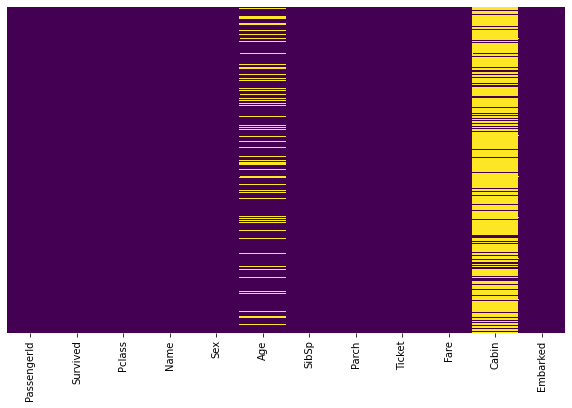

In [7]:
plt.figure(figsize=[10,6])
sns.heatmap(titanic.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## Survival Consists = [ 0 , 1 ]
### 0 : Passenger Not Survived
### 1 : Passenger Survived

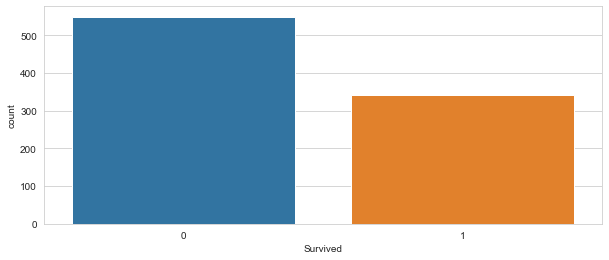

In [8]:
plt.figure(figsize=[10,4])
sns.set_style('whitegrid')
sns.countplot(titanic['Survived'])
plt.show()

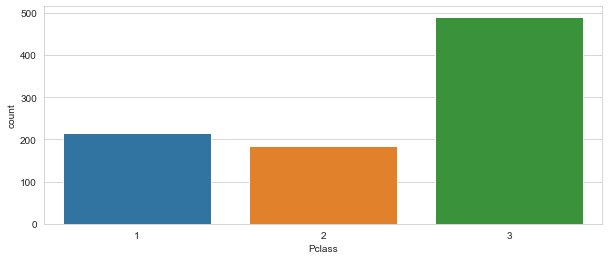

In [9]:
plt.figure(figsize=[10,4])

sns.countplot(titanic['Pclass'])
plt.show()

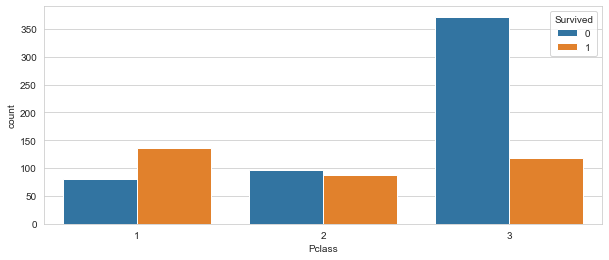

In [10]:
plt.figure(figsize=[10,4])

sns.countplot(x='Pclass', data= titanic,hue='Survived')
plt.show()

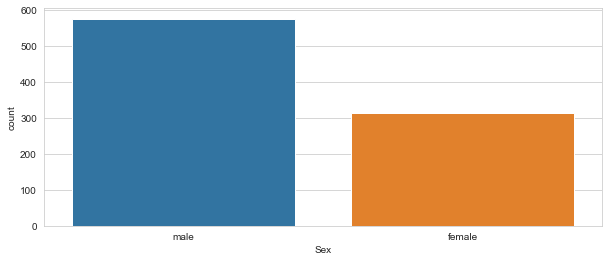

In [11]:
plt.figure(figsize=[10,4])

sns.countplot(x='Sex', data= titanic)
plt.show()

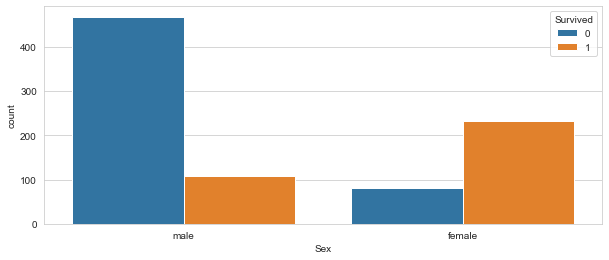

In [12]:
plt.figure(figsize=[10,4])

sns.countplot(x='Sex', data= titanic, hue='Survived')
plt.show()

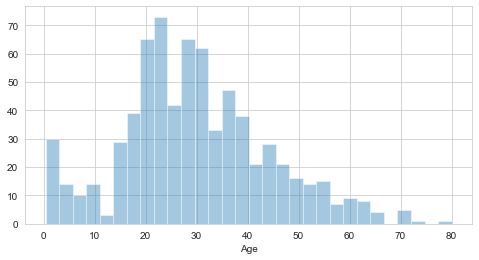

In [13]:
plt.figure(figsize=[8,4])
sns.distplot(titanic['Age'].dropna(), bins=30, kde=False)
plt.show()

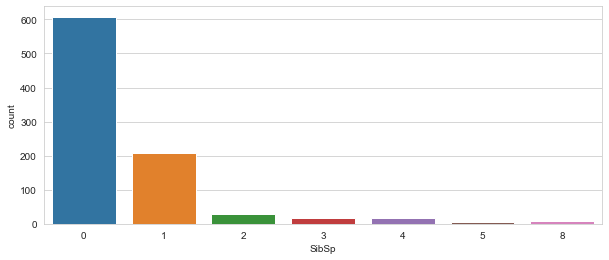

In [14]:
plt.figure(figsize=[10,4])

sns.countplot(x='SibSp', data= titanic)
plt.show()

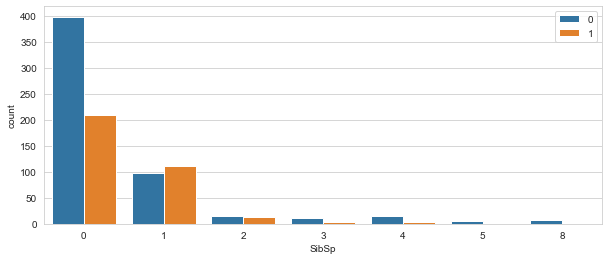

In [15]:
plt.figure(figsize=[10,4])

sns.countplot(x='SibSp', data= titanic, hue='Survived')
plt.legend(loc='upper right')
plt.show()

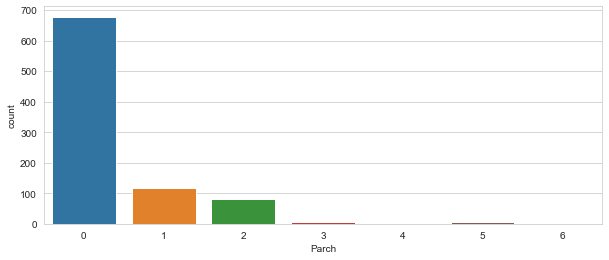

In [16]:
plt.figure(figsize=[10,4])

sns.countplot(x='Parch', data= titanic)
plt.show()

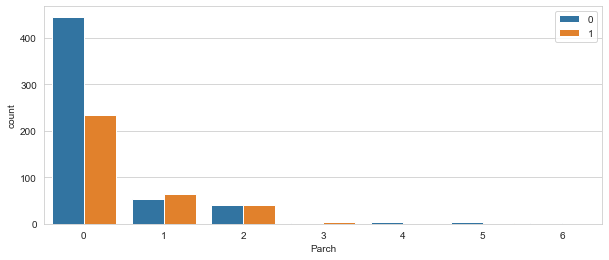

In [17]:
plt.figure(figsize=[10,4])

sns.countplot(x='Parch', data= titanic, hue='Survived')
plt.legend(loc=1)
plt.show()

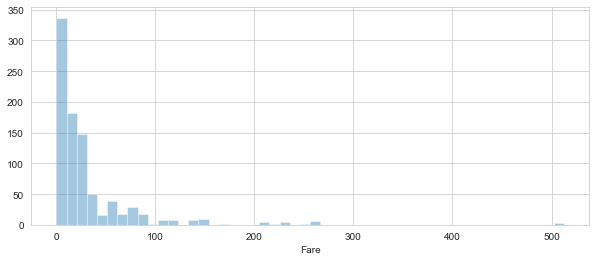

In [18]:
plt.figure(figsize=[10,4])

sns.distplot(titanic['Fare'], kde=False, bins=50)
plt.show()

## Feature Engineering
  1.Creating New Features Depending On Existing Features. 
  
  2.Converting Feature Values From Alphabetical To Numerical Categories.
  
  3.Dropping Unnecessary Features.

In [19]:
titanic['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [20]:
titanic['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [21]:
titanic['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Don           1
Lady          1
Capt          1
Mme           1
Countess      1
Ms            1
Jonkheer      1
Sir           1
Name: Title, dtype: int64

In [22]:
title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 'Rev':3, 'Dr':3, 'Col':3, 'Ms':3, 'Major':3, 'Mlle':3, 'Lady':3,
                 'Mme':3,'Countess':3, 'Sir':3, 'Dona':3, 'Capt':3, 'Don':3, 'Jonkheer':3}

titanic['Title'] = titanic['Title'].map(title_mapping)

In [23]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
titanic = pd.get_dummies(data=titanic, columns=['Sex','Embarked'], drop_first=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,1


In [25]:
titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,2,0,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


## Data Cleaning
### Handling Missing Values In Data

In [26]:
titanic.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Title           0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [27]:
titanic['Age'].fillna(titanic.groupby('Pclass')['Age'].transform('mean'), inplace=True)

In [28]:
titanic.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Title         0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

## Train Test Split

In [29]:
X_train, X_test, y_train, y_test = train_test_split( titanic.drop('Survived', axis=1), titanic['Survived'].astype('int'), test_size=0.10, random_state=42)

## Building a Logistic Regression model

In [30]:
logregr = LogisticRegression(max_iter=10000)  

In [31]:
logregr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [32]:
logregr.coef_

array([[-0.96530299, -0.03298654, -0.46618474, -0.24748116,  0.00337644,
         0.73770369, -1.9784377 , -0.18468596, -0.36572992]])

In [33]:
logregr.intercept_

array([3.82792374])

In [34]:
logregr.score(X_train, y_train)

0.818976279650437

## Prediction & Evaluation

In [35]:
pred_y = logregr.predict(X_test)

In [36]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        54
           1       0.73      0.83      0.78        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90

